In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
properties_2016 = pd.read_csv('../properties_2016_sample.csv')
properties_2016_train = pd.read_csv('../train_2016_v2.csv')

In [10]:
for clm, dtype in zip(properties_2016.columns,properties_2016.dtypes):
    if dtype == np.float64:
        properties_2016[clm] = properties_2016[clm].astype(np.float32)
df_train = properties_2016.merge(properties_2016_train, how='left', on='parcelid')
del properties_2016_train,properties_2016

df_train.drop(['parcelid','transactiondate'], axis=1, inplace=True)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2998
Data columns (total 58 columns):
airconditioningtypeid           996 non-null float32
architecturalstyletypeid        0 non-null float32
basementsqft                    8 non-null float32
bathroomcnt                     2999 non-null float32
bedroomcnt                      2999 non-null float32
buildingclasstypeid             61 non-null float32
buildingqualitytypeid           1810 non-null float32
calculatedbathnbr               2653 non-null float32
decktypeid                      74 non-null float32
finishedfloor1squarefeet        869 non-null float32
calculatedfinishedsquarefeet    2932 non-null float32
finishedsquarefeet12            2770 non-null float32
finishedsquarefeet13            52 non-null float32
finishedsquarefeet15            109 non-null float32
finishedsquarefeet50            869 non-null float32
finishedsquarefeet6             1 non-null float32
fips                            2999 non-null in

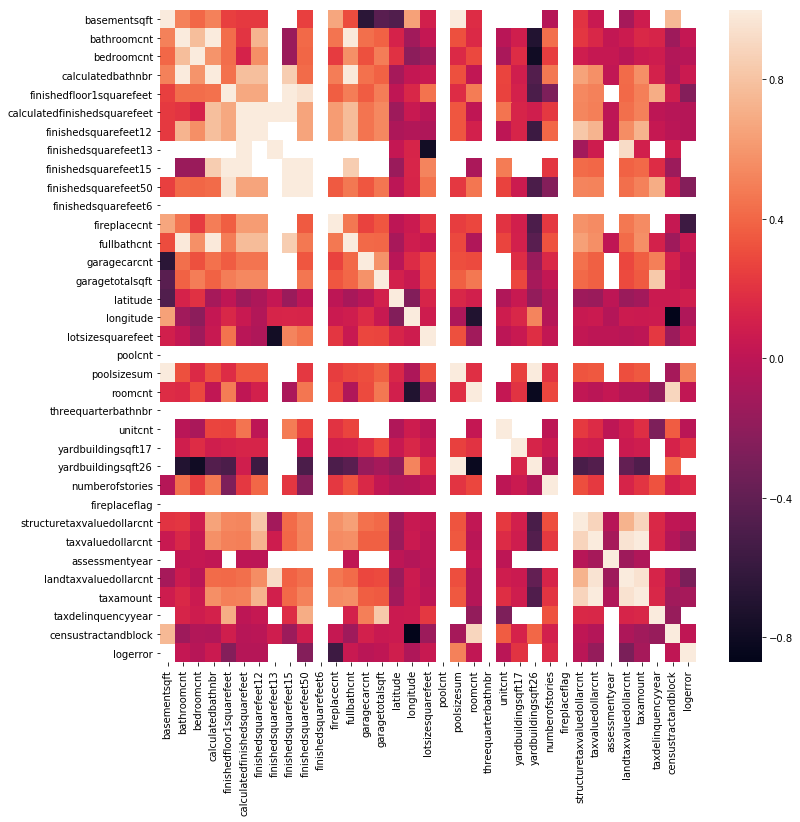

<Figure size 432x288 with 0 Axes>

In [32]:
catcls = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid','buildingclasstypeid','decktypeid','fips','hashottuborspa','heatingorsystemtypeid','pooltypeid10','pooltypeid2','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','storytypeid','typeconstructiontypeid','yearbuilt','taxdelinquencyflag']
numcols = [x for x in df_train.columns if x not in catcls]

plt.figure(figsize=(12, 12))
sns.heatmap(data=df_train[numcols].corr())
plt.show()
plt.gcf().clear()

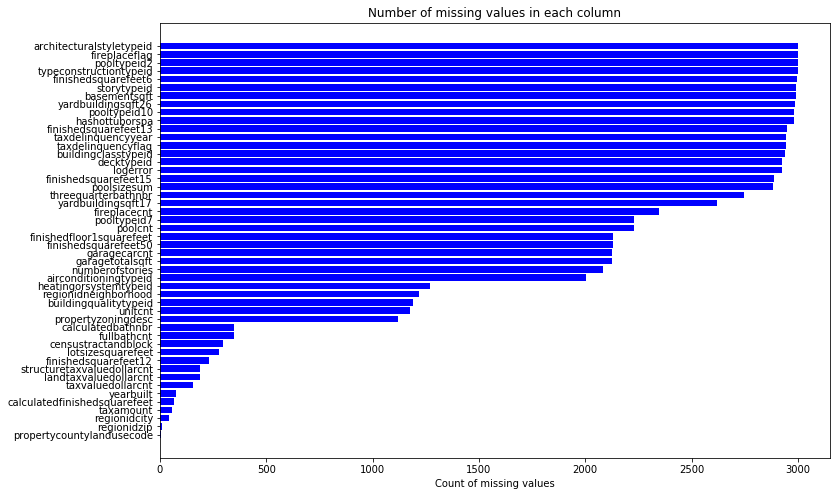

In [41]:
missing_col_cnts = df_train.isnull().sum(axis=0).reset_index()
missing_col_cnts.columns = ['column_name','missing_cnt']
missing_col_cnts = missing_col_cnts.loc[missing_col_cnts['missing_cnt'] > 0]
missing_col_cnts = missing_col_cnts.sort_values(by='missing_cnt')

#ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12, 8))
rects = ax.barh(missing_col_cnts.column_name.values,missing_col_cnts.missing_cnt.values,color = 'blue')
#ax.set_yticks(missing_col_cnts.column_name.values)
#ax.set_yticklabels(missing_col_cnts.column_name.values,rotation = 'horizontal')
ax.set_xlabel('Count of missing values')
ax.set_title('Number of missing values in each column')
plt.show()

In [26]:
missing_col_cnts.head()

,column_name,missing_cnt
31,propertycountylandusecode,3
38,regionidzip,8
35,regionidcity,44
53,taxamount,57
10,calculatedfinishedsquarefeet,67


In [45]:
dropcols = ['finishedsquarefeet12','finishedsquarefeet13', 'fullbathcnt','finishedsquarefeet15','finishedsquarefeet6','finishedsquarefeet50','calculatedbathnbr']
index = df_train.hashottuborspa.isnull()
#index.head()

df_train.loc[index,'hashottuborspa'] = "None"
print(df_train.hashottuborspa.value_counts())
print(df_train.pooltypeid10.value_counts())

dropcols.append('pooltypeid10')

index = df_train.pooltypeid2.isnull()
df_train.loc[index,'pooltypeid2']=0

index = df_train.pooltypeid7.isnull()
df_train.loc[index,'pooltypeid7'] = 0

index = df_train.poolcnt.isnull()
df_train.loc[index,'poolcnt'] = 0

None    2981
True      18
Name: hashottuborspa, dtype: int64
1.0    18
Name: pooltypeid10, dtype: int64


In [47]:
print(df_train.poolsizesum.isnull().sum())
print(df_train.poolcnt.value_counts())

poolsizemedian = df_train.loc[df_train['poolcnt'] > 0, 'poolsizesum'].median()
df_train.loc[(df_train['poolcnt'] > 0) & (df_train['poolsizesum'].isnull()),'poolsizesum'] =poolsizemedian
df_train.loc[df_train['poolcnt'] > 0, 'poolsizesum'] = 0

2883
1.0    772
Name: poolcnt, dtype: int64


In [48]:
print(df_train.fireplaceflag.isnull().sum())
print(df_train.fireplacecnt.isnull().sum())

df_train['fireplaceflag'] = "No"
df_train.loc[df_train['fireplacecnt'] > 0,'fireplaceflag'] = "Yes"

index = df_train.fireplacecnt.isnull()
df_train.loc[index,'fireplacecnt'] = 0


2999
2348


In [49]:
index = df_train.taxdelinquencyflag.isnull()
df_train.loc[index, 'taxdelinquencyflag'] = "None"

In [50]:
print(df_train.garagecarcnt.isnull().sum())
print(df_train.garagetotalsqft.isnull().sum())

index = df_train.garagecarcnt.isnull()
df_train.loc[index, 'garagecarcnt'] = 0

index = df_train.garagetotalsqft.isnull()
df_train.loc[index, 'garagetotalsqft'] = 0

df_train['airconditioningtypeid'].value_counts()
index = df_train.airconditioningtypeid.isnull()
df_train.loc[index, 'airconditioningtypeid'] = 1

2127
2127


In [51]:
print(df_train['heatingorsystemtypeid'].value_counts())

index = df_train.heatingorsystemtypeid.isnull()
df_train.loc[index, 'heatingorsystemtypeid'] = 2

print(df_train['threequarterbathnbr'].value_counts())
index = df_train.threequarterbathnbr.isnull()
df_train.loc[index,'threequarterbathnbr'] = 1

2.0    1334
7.0     395
Name: heatingorsystemtypeid, dtype: int64
1.0    254
Name: threequarterbathnbr, dtype: int64


In [ ]:
missing_values_prop = (df_train.isnull().sum()/len(df_train)).reset_index()
missing_values_prop.columns = ['Column_Name', 'proportion']
missing_values_prop.sort_values(by='proportion',ascending=False,inplace=True)

missing_prop_cols = missing_values_prop[missing_values_prop['proportion'] > 0.97].field.tolist()